<a href="https://colab.research.google.com/github/amandaswens/DSPS_ASwenson/blob/main/HW2/Instructions_Bayesian_posteriors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Do priors matter??

Inspired by https://twitter.com/rlmcelreath/status/1701165078949581182/photo/1

TASK 1: Use `scipy.stats` to generate four distributions:
- a standard normal with mean 0, variance 1
- a standard normal with mean 10, variance 1
- a student's with 2 degrees of freedom centered on 0
- a student's with 2 degrees of freedom centered on 10

Plot all the distributions.


TASK 2: Create a function that takes two arguments: (1) a prior distribution (as a numpy array), (2) a likelihood distribution (same), calculates the posterior distributions, and plots the prior (with a black dashed line), likelihood (black solid line), and posterior (red line). Normalize each distribution before calculating the prior and plotting so that the peak is at the same height (for optimal visibility).

TASK 3: Pass to the function each combination of prior and likelihood between the four distributions you creted: normal-normal, t-t, normal-t, t-normal.

Your should end up with a plot of the posterior linelihood and prior in the same plot for each of the four posterior distributions (4 plots). EACH PLOT SHOULD BE FOLLOWED BY A CAPTION DESCRIBING THE WHAT THE WHY AND THE "WOW"



In [2]:
#these are all the imports you need
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, t
...

Ellipsis

## Task #1: Generating four distributions

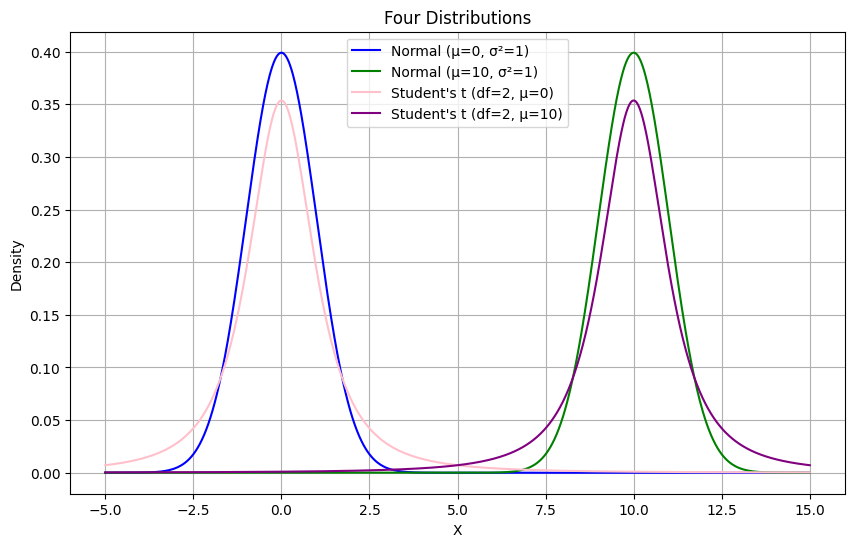

In [3]:
x = np.linspace(-5,15,1000)
Norm_0 = norm.pdf(x, loc=0, scale=1)
Norm_10 = norm.pdf(x, loc =10, scale=1)
tStudent_0 = t.pdf(x, df=2, loc=0, scale=1)
tStudent_10 = t.pdf(x, df=2, loc=10, scale=1)

plt.figure(figsize=(10, 6))
plt.plot(x, Norm_0, label='Normal (μ=0, σ²=1)', color='blue')
plt.plot(x, Norm_10, label='Normal (μ=10, σ²=1)', color='green')
plt.plot(x, tStudent_0, label="Student's t (df=2, μ=0)", color='pink')
plt.plot(x, tStudent_10, label="Student's t (df=2, μ=10)", color='purple')
plt.xlabel('X')
plt.ylabel('Density')
plt.title('Four Distributions')
plt.legend()
plt.grid(True)
plt.show()


## Task #2: Making function to compute and plot posterior distribution

In [4]:
def posterior(prior, likelihood, title, caption):
  normalized_prior = prior / np.max(prior)
  normalized_likelihood = likelihood / np.max(likelihood)

  posterior = normalized_prior * normalized_likelihood
  posterior = posterior / np.max(posterior)

  plt.figure(figsize=(8, 5))
  plt.plot(x, normalized_prior, 'k--', label='Prior')
  plt.plot(x, normalized_likelihood, 'k-', label='Likelihood')
  plt.plot(x, posterior, 'r-', label='Posterior')
  plt.xlabel('X')
  plt.ylabel('Normalized Density')
  plt.title(title)
  plt.legend()
  plt.grid(True)
  plt.show()

  print(caption)

## Task #3: Computing and plotting for each combination

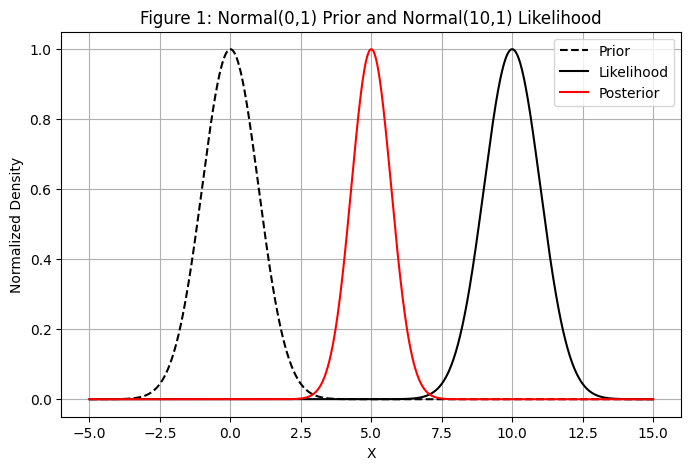


               CAPTION:

               - What: This plot shows the posterior from a Normal(0,1) prior and a Normal(10,1) likelihood.
               - Why: Combining normal distributions with different means tests how Bayesian updating handles conflicting evidence, as their peaks are far apart, leading to minimal overlap.
               - Wow: The posterior has very low density due to the lack of overlap, appearing prominent only due to normalization. This shows that strongly conflicting prior and likelihood produce a nearly uninformative posterior, centered between the two means.
               


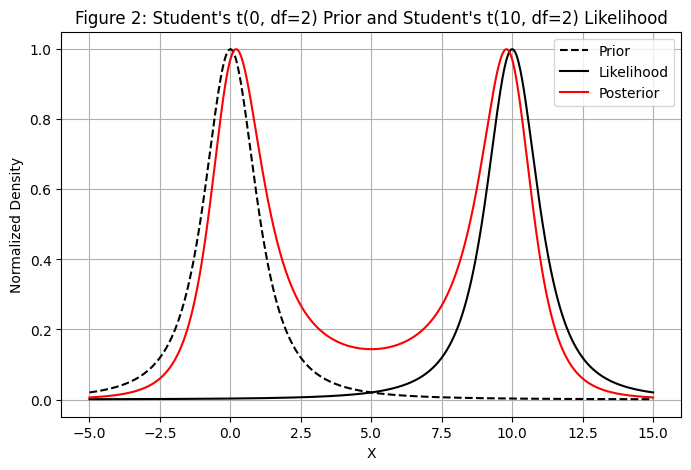


               CAPTION:

               - What: This plot displays the posterior from a Student's t(0, df=2) prior and a Student's t(10, df=2) likelihood.
               - Why: Combining t-distributions with different means and heavy tails examines how robust Bayesian updating is to extreme values when evidence conflicts.
               - Wow: The posterior is broader than the Normal-Normal case due to the heavy tails of t-distributions, showing more tolerance to outliers but still low density due to minimal overlap.
               


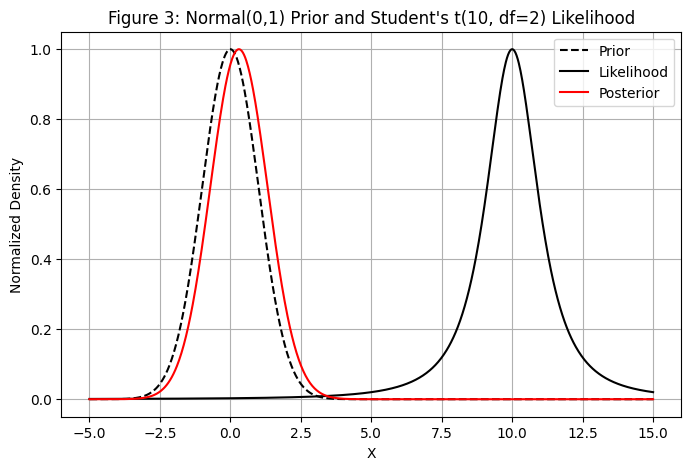


               CAPTION: 

               - What: This plot shows the posterior from a Normal(0,1) prior and a Student's t(10, df=2) likelihood.
               - Why: Combining a precise normal prior with a heavy-tailed t-likelihood centered far apart tests how the posterior balances precision and robustness to outliers.
               - Wow: The posterior is slightly broader than the Normal-Normal case due to the t-likelihood’s heavy tails, but its low density reflects the conflict between the prior and likelihood.
               


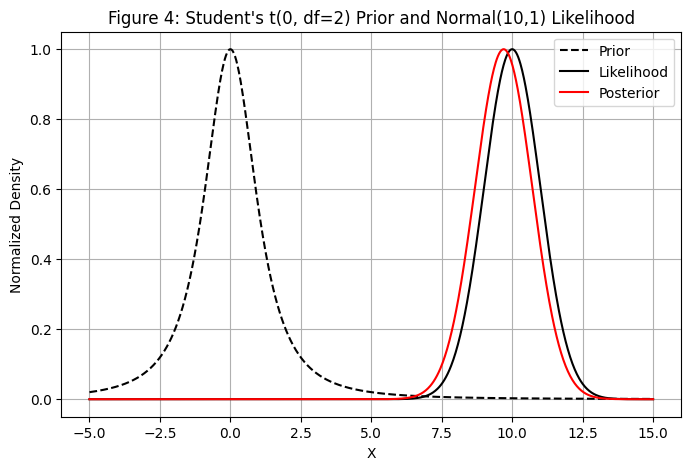


               CAPTION:
               
              - What: This plot illustrates the posterior from a Student's t(0, df=2) prior and a Normal(10,1) likelihood.
              - Why: A heavy-tailed t-prior combined with a precise normal likelihood, centered far apart, shows how the posterior handles uncertainty and precision in conflicting evidence.
              - Wow: The posterior is influenced by the t-prior’s heavy tails, resulting in a slightly broader shape than the Normal-Normal case, but remains nearly uninformative due to minimal overlap.
               


In [12]:
posterior(Norm_0, Norm_10, "Figure 1: Normal(0,1) Prior and Normal(10,1) Likelihood",
               """
               CAPTION:

               - What: This plot shows the posterior from a Normal(0,1) prior and a Normal(10,1) likelihood.
               - Why: Combining normal distributions with different means tests how Bayesian updating handles conflicting evidence, as their peaks are far apart, leading to minimal overlap.
               - Wow: The posterior has very low density due to the lack of overlap, appearing prominent only due to normalization. This shows that strongly conflicting prior and likelihood produce a nearly uninformative posterior, centered between the two means.
               """)

posterior(tStudent_0, tStudent_10, "Figure 2: Student's t(0, df=2) Prior and Student's t(10, df=2) Likelihood",
               """
               CAPTION:

               - What: This plot displays the posterior from a Student's t(0, df=2) prior and a Student's t(10, df=2) likelihood.
               - Why: Combining t-distributions with different means and heavy tails examines how robust Bayesian updating is to extreme values when evidence conflicts.
               - Wow: The posterior is broader than the Normal-Normal case due to the heavy tails of t-distributions, showing more tolerance to outliers but still low density due to minimal overlap.
               """)

posterior(Norm_0, tStudent_10, "Figure 3: Normal(0,1) Prior and Student's t(10, df=2) Likelihood",
               """
               CAPTION:

               - What: This plot shows the posterior from a Normal(0,1) prior and a Student's t(10, df=2) likelihood.
               - Why: Combining a precise normal prior with a heavy-tailed t-likelihood centered far apart tests how the posterior balances precision and robustness to outliers.
               - Wow: The posterior is slightly broader than the Normal-Normal case due to the t-likelihood’s heavy tails, but its low density reflects the conflict between the prior and likelihood.
               """)

posterior(tStudent_0, Norm_10, "Figure 4: Student's t(0, df=2) Prior and Normal(10,1) Likelihood",
               """
               CAPTION:

              - What: This plot illustrates the posterior from a Student's t(0, df=2) prior and a Normal(10,1) likelihood.
              - Why: A heavy-tailed t-prior combined with a precise normal likelihood, centered far apart, shows how the posterior handles uncertainty and precision in conflicting evidence.
              - Wow: The posterior is influenced by the t-prior’s heavy tails, resulting in a slightly broader shape than the Normal-Normal case, but remains nearly uninformative due to minimal overlap.
               """)